Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

**Important Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

# Overview of Dandiset 000673

This Dandiset contains data for the study "Control of working memory by phase–amplitude coupling of human hippocampal neurons" by Daume et al. (2025). The study investigates the role of theta–gamma phase–amplitude coupling (TG-PAC) in coordinating frontal control and hippocampal persistent activity during working memory tasks.

Neurosift link: https://neurosift.app/dandiset/001176/000673

# Notebook Overview

This notebook will guide you through the process of exploring and analyzing data from Dandiset 000673. We will cover the following steps:

1.  Loading the Dandiset using the DANDI API.
2.  Loading an NWB file from the Dandiset.
3.  Exploring the metadata of the NWB file.
4.  Loading and visualizing data from the NWB file, including LFP data, events, and stimulus information.
5.  Summarizing findings and suggesting possible future directions for analysis.

# Required Packages

The following packages are required to run this notebook. Please ensure that they are installed in your environment.

*   pynwb
*   h5py
*   remfile
*   numpy
*   matplotlib
*   seaborn

# Loading the Dandiset

We will use the DANDI API to load the Dandiset. The following code connects to the DANDI archive and retrieves the Dandiset with ID "000673".

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 44 assets in the dataset
\nFirst 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb
- sub-12/sub-12_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-2_ecephys+image.nwb
- sub-10/sub-10_ses-1_ecephys+image.nwb


# Loading an NWB File and Exploring Metadata

We will load the NWB file `sub-1/sub-1_ses-1_ecephys+image.nwb` and explore its metadata.
The URL for this asset is `https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb)
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


root pynwb.file.NWBFile at 0x139883250268112
Fields:
  acquisition: {
    LFPs <class 'pynwb.ecephys.ElectricalSeries'>,
    events <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    NLX-microwires-129 <class 'pynwb.device.Device'>,
    NLX-microwires-130 <class 'pynwb.device.Device'>,
    NLX-microwires-131 <class 'pynwb.device.Device'>,
    NLX-microwires-132 <class 'pynwb.device.Device'>,
    NLX-microwires-133 <class 'pynwb.device.Device'>,
    NLX-microwires-134 <class 'pynwb.device.Device'>,
    NLX-microwires-135 <class 'pynwb.device.Device'>,
    NLX-microwires-136 <class 'pynwb.device.Device'>,
    NLX-microwires-137 <class 'pynwb.device.Device'>,
    NLX-microwires-138 <class 'pynwb.device.Device'>,
    NLX-microwires-140 <class 'pynwb.device.Device'>,
    NLX-microwires-141 <class 'pynwb.device.Device'>,
    NLX-microwires-142 <class 'pynwb.device.Device'>,
    NLX-microwires-143 <class 'pynwb.device.Device'>,
    NLX-microwires-144 <class 'pynwb.device.Device'>,
    NLX-m

# Loading and Visualizing Data

Now, let's load and visualize some data from the NWB file. We will start by loading the LFP data and plotting a segment of it.

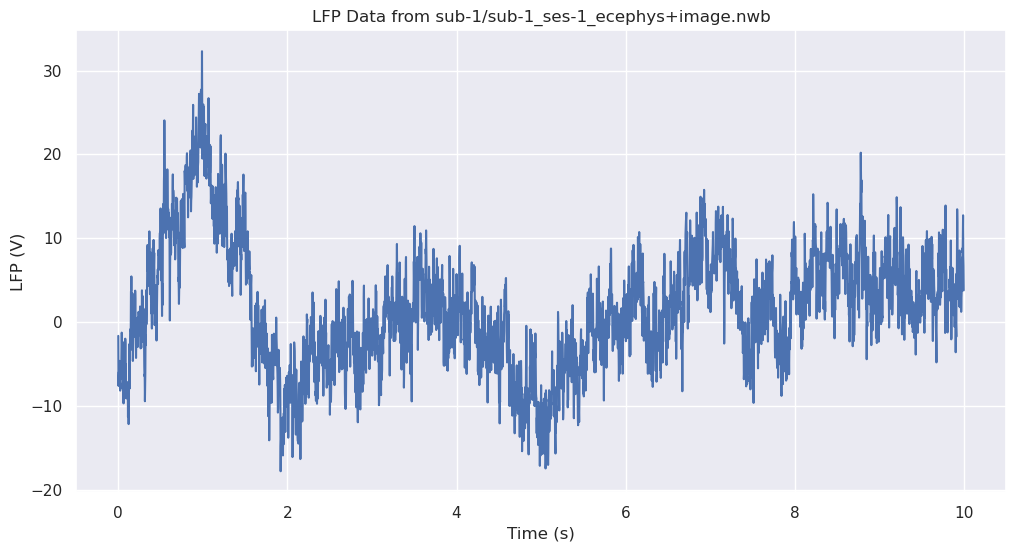

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load LFP data
lfp_data = nwb.acquisition["LFPs"].data
lfp_rate = nwb.acquisition["LFPs"].rate
lfp_timestamps = np.arange(0, lfp_data.shape[0] / lfp_rate, 1 / lfp_rate)

# Plot a segment of the LFP data
start_time = 0
end_time = 10  # seconds
start_index = int(start_time * lfp_rate)
end_index = int(end_time * lfp_rate)

plt.figure(figsize=(12, 6))
plt.plot(lfp_timestamps[start_index:end_index], lfp_data[start_index:end_index, 0])
plt.xlabel("Time (s)")
plt.ylabel("LFP (V)")
plt.title("LFP Data from sub-1/sub-1_ses-1_ecephys+image.nwb")
plt.show()

# Visualizing Events
Now, let's visualize event data from the NWB file.

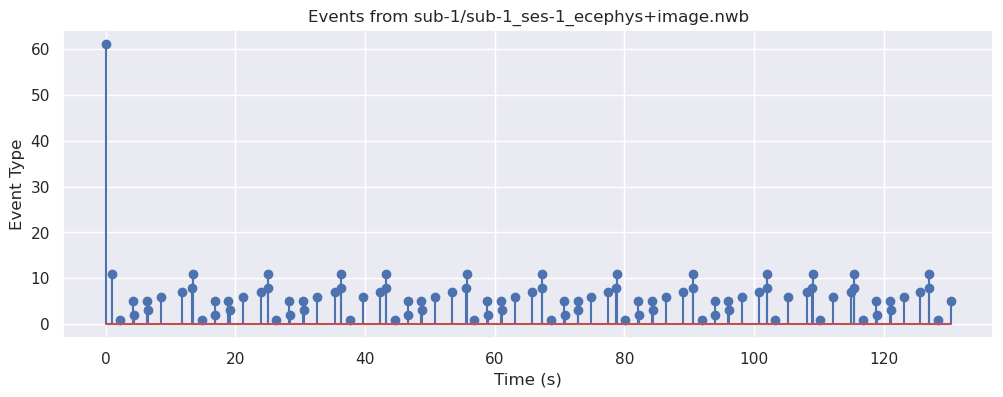

In [4]:
# Load event data
event_timestamps = nwb.acquisition["events"].timestamps
event_data = nwb.acquisition["events"].data

# Plot events
plt.figure(figsize=(12, 4))
plt.stem(event_timestamps[:100], event_data[:100])
plt.xlabel("Time (s)")
plt.ylabel("Event Type")
plt.title("Events from sub-1/sub-1_ses-1_ecephys+image.nwb")
plt.show()

# Accessing Stimulus Presentation

Here we will show how to access stimulus presentation data.

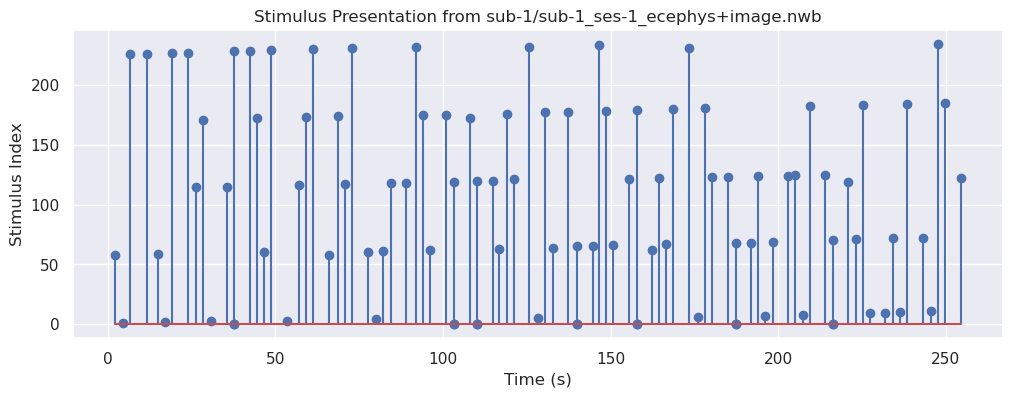

In [5]:
# Access stimulus presentation data
stimulus_presentation_timestamps = nwb.stimulus["StimulusPresentation"].timestamps
stimulus_presentation_data = nwb.stimulus["StimulusPresentation"].data

# Plot stimulus presentation
plt.figure(figsize=(12, 4))
plt.stem(stimulus_presentation_timestamps[:100], stimulus_presentation_data[:100])
plt.xlabel("Time (s)")
plt.ylabel("Stimulus Index")
plt.title("Stimulus Presentation from sub-1/sub-1_ses-1_ecephys+image.nwb")
plt.show()

# Summary and Future Directions

This notebook has provided a basic introduction to exploring Dandiset 000673. We have demonstrated how to load the Dandiset, access NWB files, explore metadata, and visualize LFP, event, and stimulus presentation data.

Possible future directions for analysis include:

*   Performing more advanced signal processing on the LFP data, such as spectral analysis.
*   Investigating the relationship between LFP activity and events.
*   Analyzing the stimulus presentation data in more detail.
*   Exploring other NWB files within the Dandiset.